In [ ]:
import tensorflow as tf

In [193]:
# list tf devices
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import random
from data_loader import load_images_and_labels
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing and Feature Engineering Data

In [ ]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

exclude_classes = {"airplanes", "Motorbikes", "Faces", "Faces_easy", "watch", "Leopards"}
images, labels, class_names = load_images_and_labels(directory, img_height, img_width, exclude_classes)

In [174]:
class_names

['accordion',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooster',
 'saxophone',
 'schooner',
 'scissors',
 'scorpion',
 'sea_horse',
 'snoopy',
 'socce

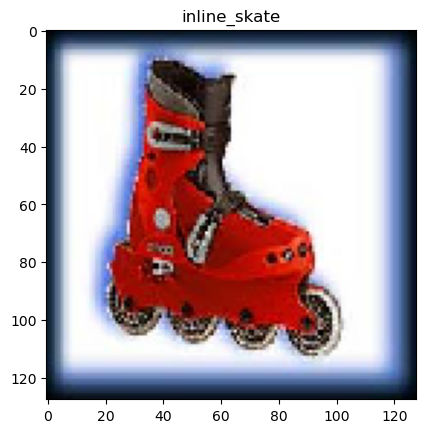

In [175]:
# show a random image
show_images = images / 255.0
index = random.randint(0, len(show_images))
plt.imshow(show_images[index])
plt.title(class_names[labels[index]])
plt.show()

# Data Augmentation

As seen in [exploratory_data_analysis.ipynb](exploratory_data_analysis.ipynb), each class has a different number of images. This will cause bias in our model towards certain classes. We need to fix this by generating more images for the classes that are under represented.

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

unique_classes, class_counts = np.unique(labels, return_counts=True)
max_count = np.max(class_counts)

balanced_images = []
balanced_labels = []

for class_id in unique_classes:
    # get all images and labels of the current class
    class_images = images[labels == class_id]
    class_labels = labels[labels == class_id]
    
    # add the ones we already have to the balanced dataset
    balanced_images.extend(class_images)
    balanced_labels.extend(class_labels)
    
    num_to_generate = max_count - len(class_images)
    
    if num_to_generate > 0:
        augmented_images = []
        augmented_labels = []
        # generate new images
        for x_batch, y_batch in datagen.flow(class_images, class_labels, batch_size=num_to_generate):
            augmented_images.extend(x_batch)
            augmented_labels.extend(y_batch)
            if len(augmented_images) >= num_to_generate:
                break
        
        # add generated images to balanced dataset
        balanced_images.extend(augmented_images[:num_to_generate])
        balanced_labels.extend(augmented_labels[:num_to_generate])

balanced_images = np.array(balanced_images)
balanced_labels = np.array(balanced_labels)
balanced_images = balanced_images / 255.0 # normalize

In [179]:
x_train, x_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, stratify=balanced_labels, random_state=123)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Class Names: ['accordion', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler', 'starfish', 'stegosaurus', 'stop_sign', 'straw

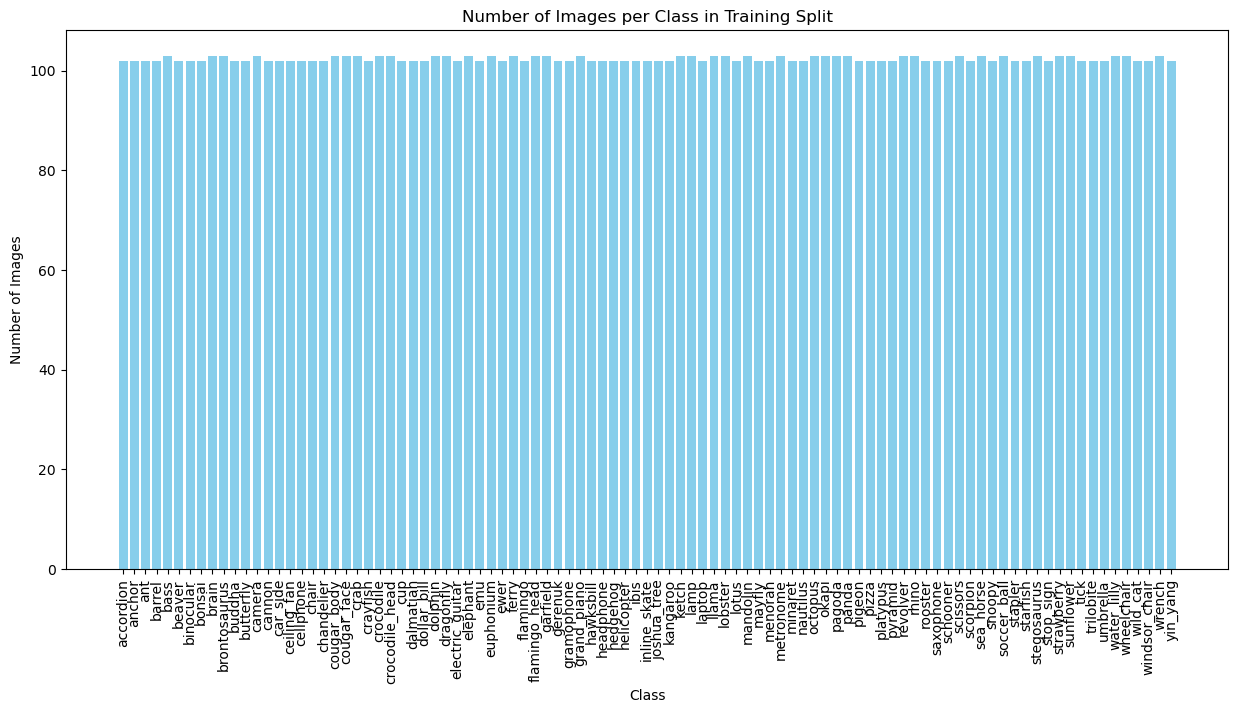

In [180]:
# show number of images per class in the training split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names, np.bincount(y_train), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Training Split')
plt.show()

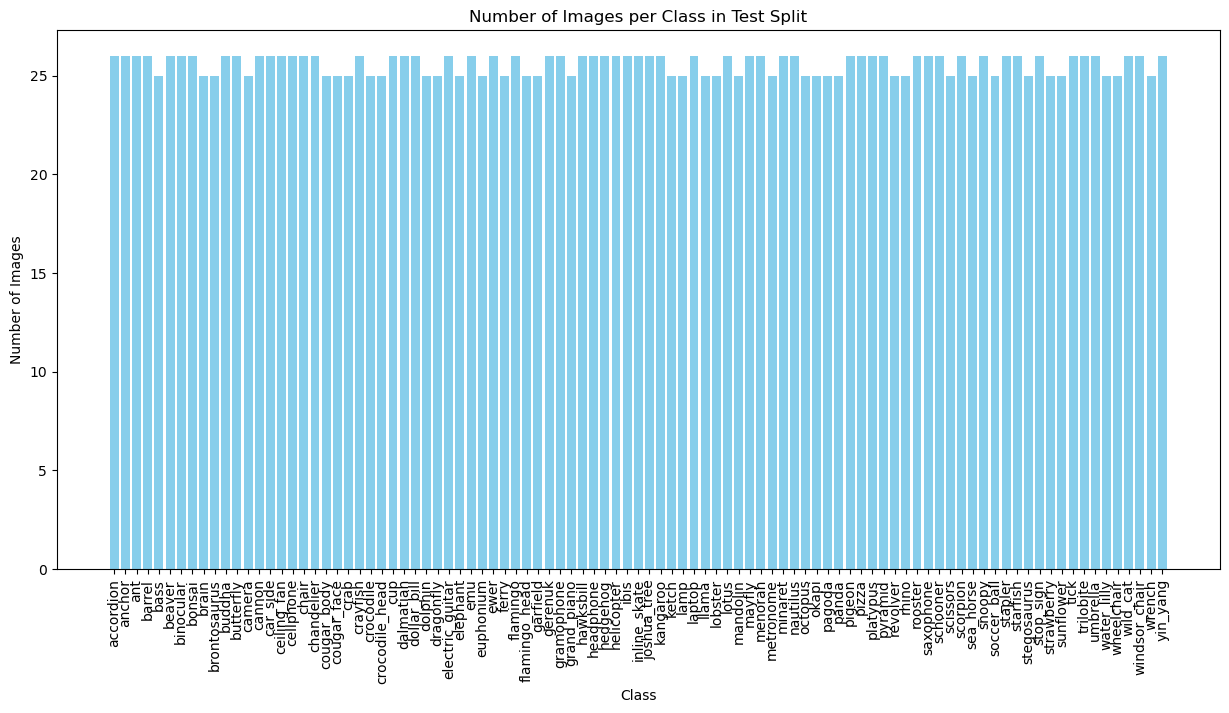

In [181]:
# show number of images per class in the test split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names, np.bincount(y_test), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Test Split')
plt.show()

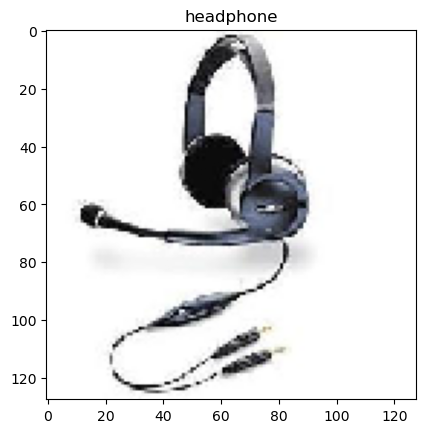

In [ ]:
# shows a random augmented image
index = random.randint(0, len(show_images))
plt.imshow(balanced_images[index])
plt.title(class_names[balanced_labels[index]])
plt.show()

# CNN Model

In [183]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 32)       128       
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               65028608  
                                                                 
 dropout_1 (Dropout)         (None, 512)              

In [184]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    mode="max",
    restore_best_weights=True,
    verbose=1,
)

history = model.fit(
    x_train, y_train, epochs=100, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
244/244 [==============================] - ETA: 0s - loss: 10.2765 - accuracy: 0.0162
Epoch 1: val_accuracy improved from -inf to 0.00976, saving model to best_model_fix_overfitting.h5
244/244 [==============================] - 43s 42ms/step - loss: 10.2765 - accuracy: 0.0162 - val_loss: 4.5549 - val_accuracy: 0.0098
Epoch 2/100
243/244 [============================>.] - ETA: 0s - loss: 4.5126 - accuracy: 0.0225
Epoch 2: val_accuracy improved from 0.00976 to 0.02004, saving model to best_model_fix_overfitting.h5
244/244 [==============================] - 10s 40ms/step - loss: 4.5122 - accuracy: 0.0226 - val_loss: 4.5552 - val_accuracy: 0.0200
Epoch 3/100
243/244 [============================>.] - ETA: 0s - loss: 4.4514 - accuracy: 0.0325
Epoch 3: val_accuracy improved from 0.02004 to 0.02724, saving model to best_model_fix_overfitting.h5
244/244 [==============================] - 10s 39ms/step - loss: 4.4514 - accuracy: 0.0325 - val_loss: 4.5436 - val_accuracy: 0.0272
Epoch

In [186]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 1s 16ms/step - loss: 6.9472 - accuracy: 0.1299
Test accuracy: 0.12993420660495758


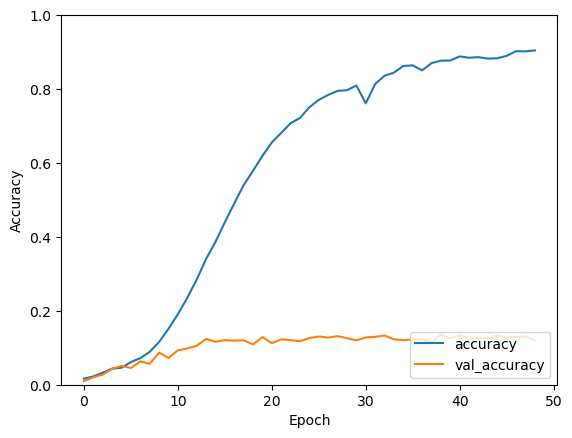

In [187]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Use transfer learning to improve results and stop overfitting

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
244/244 [==============================] - ETA: 0s - loss: 4.2350 - accuracy: 0.0590
Epoch 1: val_accuracy improved from -inf to 0.23947, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 36s 62ms/step - loss: 4.2350 - accuracy: 0.0590 - val_loss: 3.5418 - val_accuracy: 0.2395
Epoch 2/100
244/244 [==============================] - ETA: 0s - loss: 3.4987 - accuracy: 0.1628
Epoch 2: val_accuracy improved from 0.23947 to 0.41470, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 12s 51ms/step - loss: 3.4987 - accuracy: 0.1628 - val_loss: 2.7098 - val_accuracy: 0.4147
Epoch 3/100
244/244 [==============================] - ETA: 0s - loss: 3.0997 - accuracy: 0.2227
Epoch 3: val_accuracy improved from 0.41470 to 0.48972, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 12s 49ms/step - loss: 3.0997 - accuracy: 0.

In [190]:
history.history

{'loss': [4.234982013702393,
  3.498723030090332,
  3.0997157096862793,
  2.817901372909546,
  2.649601697921753,
  2.4956889152526855,
  2.356360912322998,
  2.2254109382629395,
  2.1470370292663574,
  2.064244508743286,
  2.0042600631713867,
  1.9334132671356201,
  1.839414119720459,
  1.8002148866653442,
  1.7803208827972412,
  1.7083457708358765,
  1.694082498550415,
  1.6323941946029663,
  1.574784278869629,
  1.5519790649414062,
  1.5190720558166504,
  1.4961962699890137,
  1.4334827661514282,
  1.4232279062271118,
  1.4036533832550049,
  1.391603708267212,
  1.3453822135925293,
  1.3157902956008911,
  1.3274214267730713,
  1.2742805480957031,
  1.2385262250900269,
  1.2619730234146118,
  1.228312611579895,
  1.2159656286239624,
  1.1987980604171753,
  1.1928589344024658,
  1.175312876701355,
  1.1522910594940186,
  1.1393834352493286,
  1.1341955661773682,
  1.121334195137024,
  1.1011823415756226,
  1.0970089435577393],
 'accuracy': [0.05898226797580719,
  0.16281162202358246,


In [191]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 11s 140ms/step - loss: 1.5609 - accuracy: 0.6320
Test accuracy: 0.6319901347160339


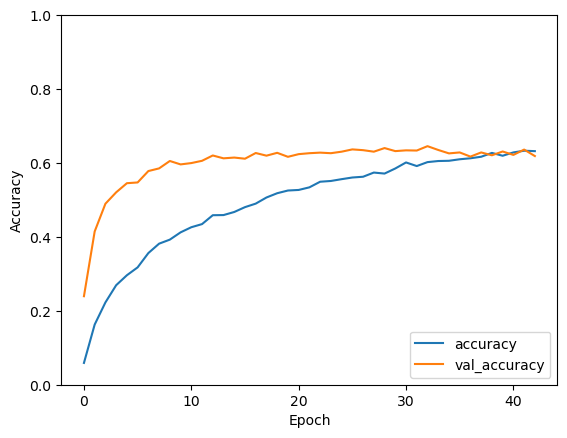

In [192]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 

As we can see above, using the pretrained model has helped stop the overfitting, but our evaluation accuracy is plateauing at just over 60%. Let's fix that by adjusting the layers.

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

# unfreeze the last layers of the base model
for layer in base_model.layers[-8:]:
    layer.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

reduce_learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=3,
    mode="auto",
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
242/244 [============================>.] - ETA: 0s - loss: 5.0975 - accuracy: 0.0808
Epoch 1: val_accuracy improved from -inf to 0.27235, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 14s 53ms/step - loss: 5.0895 - accuracy: 0.0821 - val_loss: 3.6165 - val_accuracy: 0.2724
Epoch 2/100
243/244 [============================>.] - ETA: 0s - loss: 3.3178 - accuracy: 0.2783
Epoch 2: val_accuracy improved from 0.27235 to 0.42395, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 13s 53ms/step - loss: 3.3168 - accuracy: 0.2786 - val_loss: 2.6826 - val_accuracy: 0.4239
Epoch 3/100
242/244 [============================>.] - ETA: 0s - loss: 2.7915 - accuracy: 0.3771
Epoch 3: val_accuracy improved from 0.42395 to 0.50000, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 12s 50ms/step - loss: 2.7895 - accuracy: 0.

In [206]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 11s 145ms/step - loss: 1.4779 - accuracy: 0.6789
Test accuracy: 0.6788651347160339


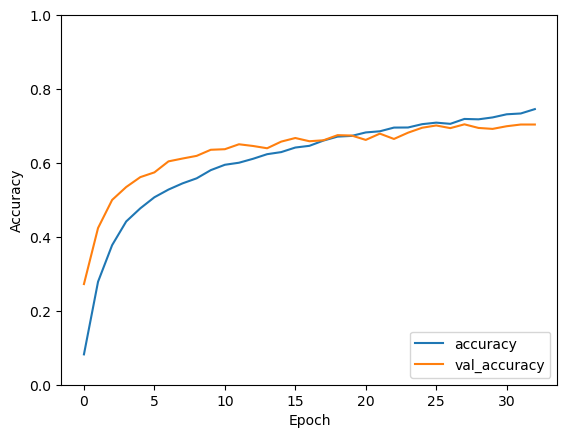

In [207]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 